In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from xgboost import XGBClassifier 
from sklearn.svm import SVC  
from sklearn import metrics 
  
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('file:///C:/Users/DHARSHINI/Downloads/NVIDIA.csv') 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000


In [3]:
df.shape

(6424, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000,6.424000e+03
mean,6.257007,6.371565,6.131920,6.256717,6.230362,6.060260e+08
std,16.294320,16.590700,15.939369,16.273800,16.276686,4.322545e+08
min,0.034896,0.035547,0.033333,0.034115,0.031291,1.968000e+07
25%,0.277500,0.286250,0.269500,0.276875,0.253957,3.456808e+08
50%,0.457375,0.465000,0.451375,0.457250,0.427725,5.069460e+08
75%,4.186188,4.240437,4.121687,4.180563,4.140063,7.361190e+08
max,139.800003,140.759995,132.419998,135.580002,135.580002,9.230856e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6424 entries, 0 to 6423
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6424 non-null   object 
 1   Open       6424 non-null   float64
 2   High       6424 non-null   float64
 3   Low        6424 non-null   float64
 4   Close      6424 non-null   float64
 5   Adj Close  6424 non-null   float64
 6   Volume     6424 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 351.4+ KB


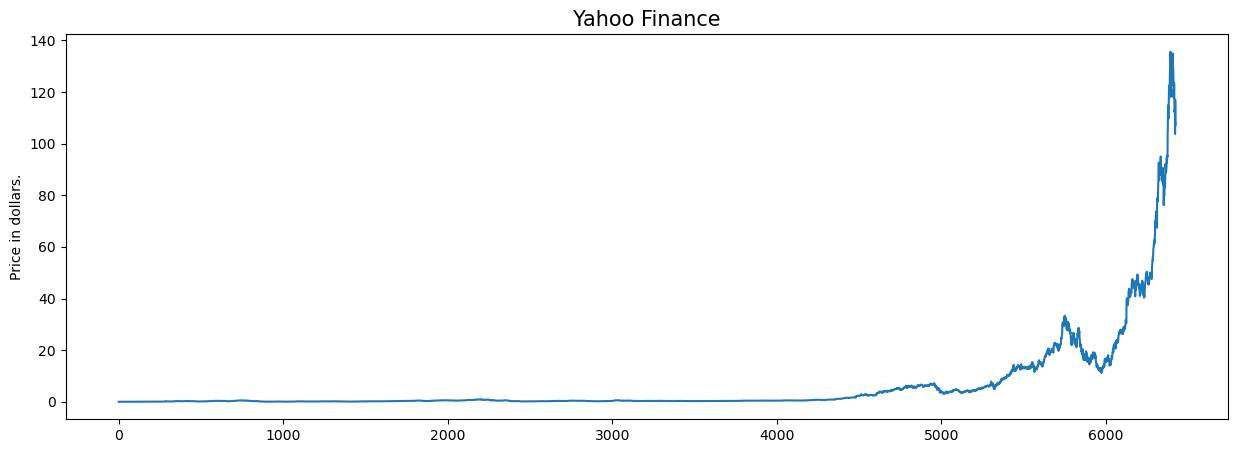

In [6]:
plt.figure(figsize=(15,5)) 
plt.plot(df['Close']) 
plt.title('Yahoo Finance', fontsize=15) 
plt.ylabel('Price in dollars.') 
plt.show()

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000


In [8]:
df[df['Close'] == df['Adj Close']].shape

(37, 7)

In [9]:
df = df.drop(['Adj Close'], axis=1)

In [10]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

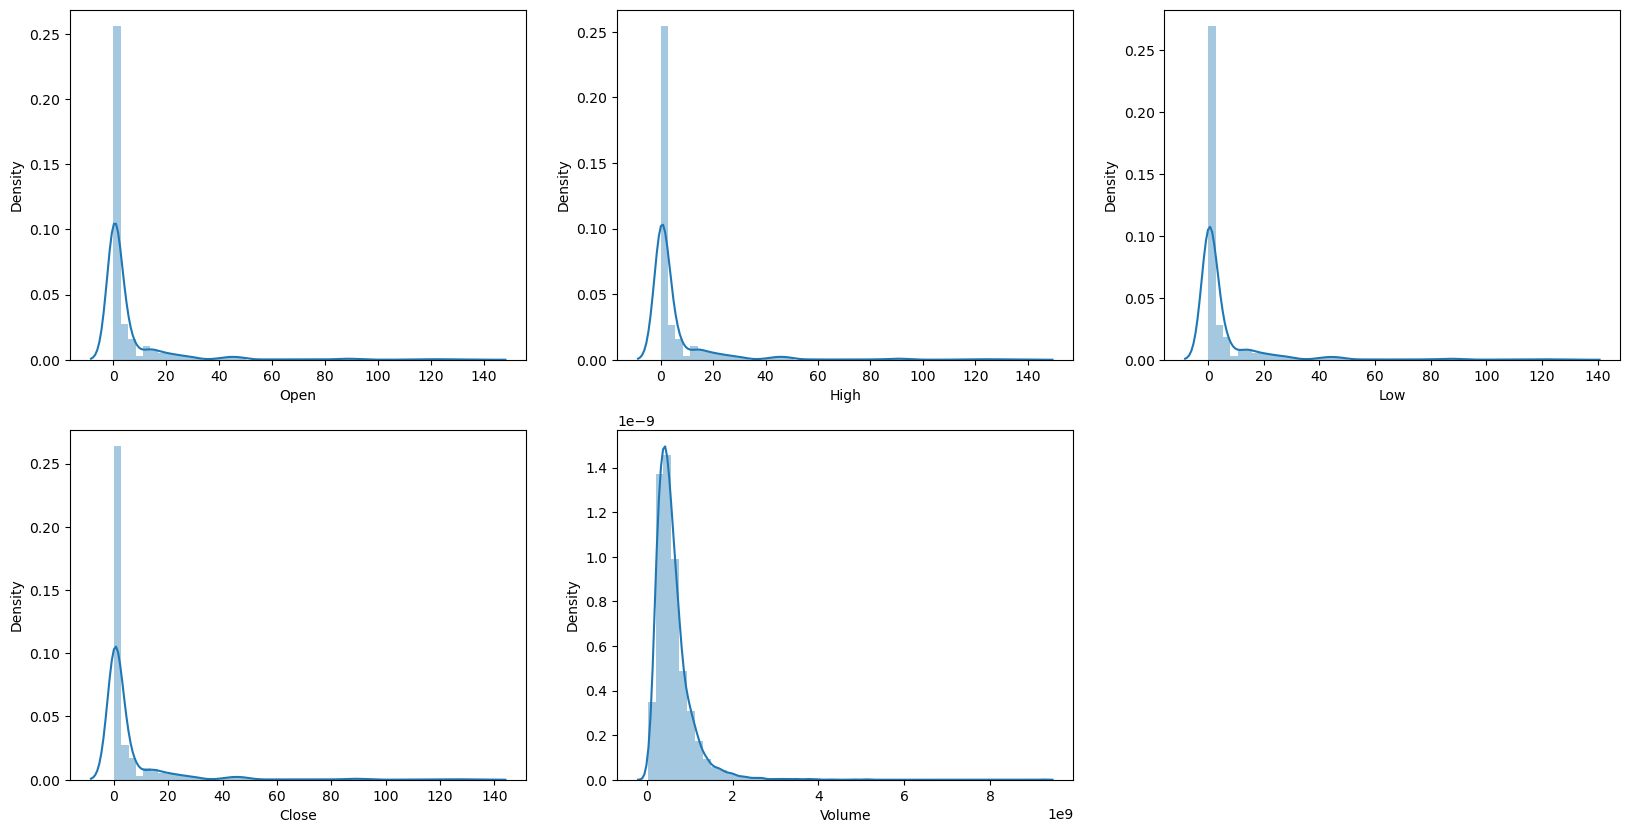

In [11]:
features = ['Open', 'High', 'Low', 'Close', 'Volume'] 
  
plt.subplots(figsize=(20,10)) 
  
for i, col in enumerate(features): 
  plt.subplot(2,3,i+1) 
  sb.distplot(df[col]) 
plt.show()

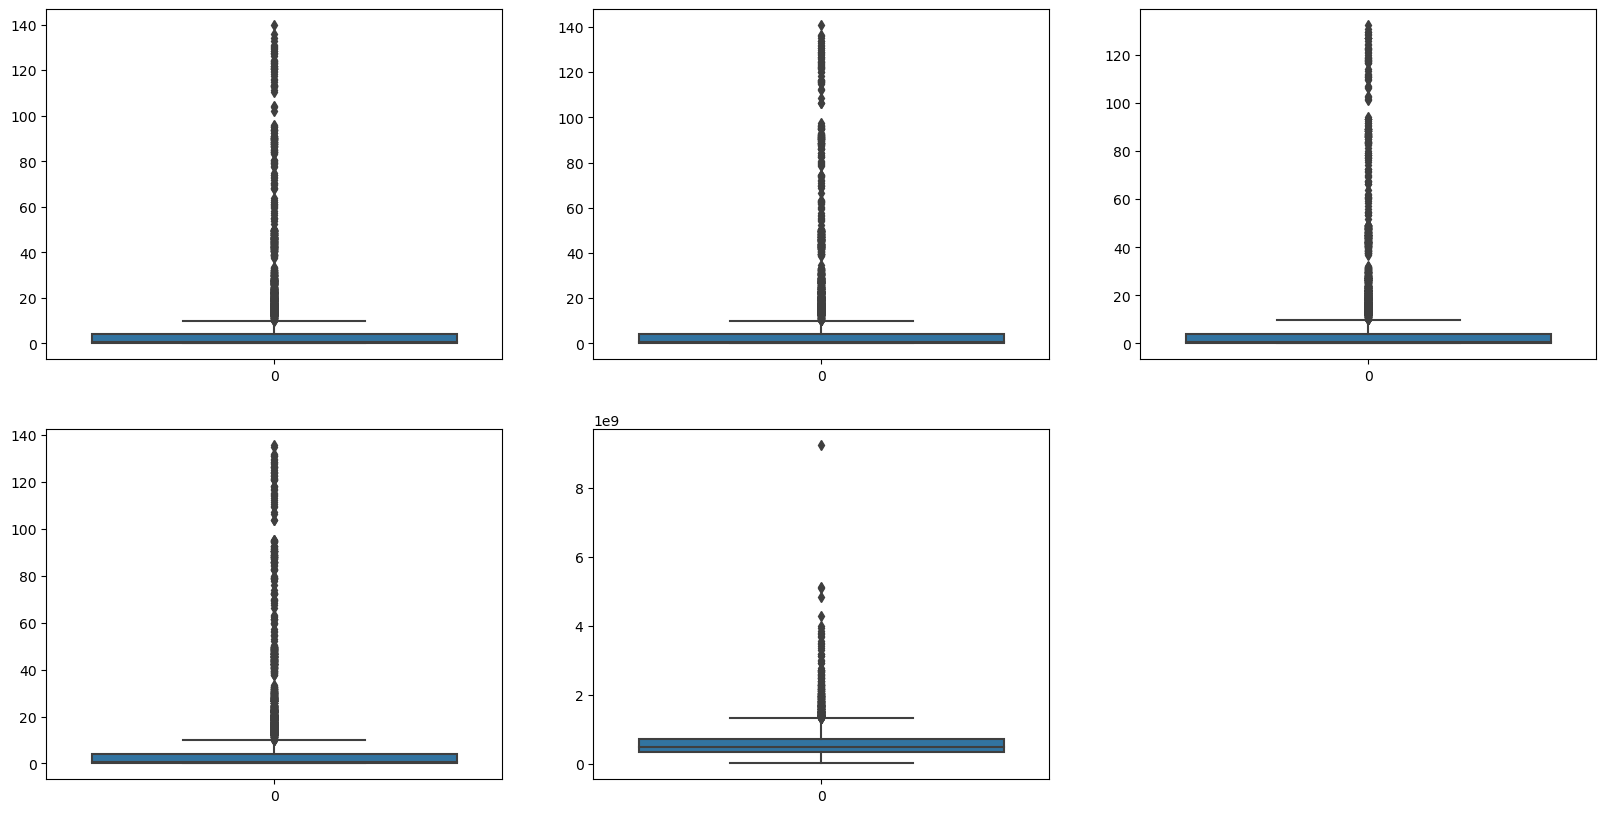

In [12]:
plt.subplots(figsize=(20,10)) 
for i, col in enumerate(features): 
  plt.subplot(2,3,i+1) 
  sb.boxplot(df[col]) 
plt.show()

In [13]:
splitted = df['Date'].str.split('-', expand=True) 
  
df['day'] = splitted[1].astype('int') 
df['month'] = splitted[0].astype('int') 
df['year'] = splitted[2].astype('int') 
  
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,2714688000,1,1999,22
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,510480000,1,1999,25
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,343200000,1,1999,26
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,244368000,1,1999,27
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,227520000,1,1999,28


In [14]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0) 
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,2714688000,1,1999,22,0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,510480000,1,1999,25,0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,343200000,1,1999,26,0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,244368000,1,1999,27,0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,227520000,1,1999,28,0


In [15]:
df['open-close']  = df['Open'] - df['Close'] 
df['low-high']  = df['Low'] - df['High'] 
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

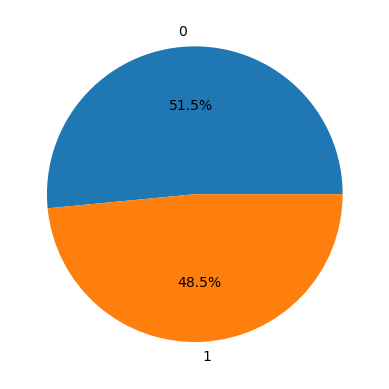

In [16]:
plt.pie(df['target'].value_counts().values,  
        labels=[0, 1], autopct='%1.1f%%') 
plt.show()

In [17]:
features = df[['open-close', 'low-high', 'is_quarter_end']] 
target = df['target'] 

scaler = StandardScaler() 
features = scaler.fit_transform(features) 

X_train, X_valid, Y_train, Y_valid = train_test_split( 
	features, target, test_size=0.1, random_state=2022) 
print(X_train.shape, X_valid.shape) 


(5781, 3) (643, 3)


In [18]:
models = [LogisticRegression(), SVC( 
kernel='poly', probability=True), XGBClassifier()] 

for i in range(3): 
    models[i].fit(X_train, Y_train) 

print(f'{models[i]} : ') 
print('Training Accuracy : ', metrics.roc_auc_score( 
	Y_train, models[i].predict_proba(X_train)[:,1])) 
print('Validation Accuracy : ', metrics.roc_auc_score( 
	Y_valid, models[i].predict_proba(X_valid)[:,1])) 
print()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.8565364503856111
Validation Accuracy :  0.5232759122953525

